# Home Credit Default Risk - In Progress

## Background Information

Home Credit is an international finance provider funded in 1997 in Czech Republic with operation in 9 different countries. The task is to used dataset provided and predict whether or nor a client will repay a loan or have difficulty repay the loan. 


## Data Description

Data is provided by Home Credit. Data can be download at Kaggle open dataset: https://www.kaggle.com/c/home-credit-default-risk/data

The Dataset including the following source:

1. application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. 
    
    
2. bureau.csv: All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.


3. bureau_balance.csv: monthly balances of previous credits in Credit Bureau.This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.


4. POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.


5. credit_card_balance.csv: Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.


6. previous_application.csv:All previous applications for Home Credit loans of clients who have loans in our sample.There is one row for each previous application related to loans in our data sample.


7. installments_payments.csv: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is a) one row for every payment that was made plus b) one row each for missed payment.One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


8. HomeCredit_columns_description.csv:This file contains descriptions for the columns in the various data files.


![home_credit.png](image/home_credit.png)

# Import Packages and Data

In [1]:
#import packages
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
# import data 
app_train = pd.read_csv("Data/application_train.csv")
app_test =pd.read_csv("Data/application_test.csv")
bureau = pd.read_csv("Data/bureau.csv")
bur_bal = pd.read_csv("Data/bureau_balance.csv")
pos_cash =pd.read_csv("Data/POS_CASH_balance.csv")
cc_balance = pd.read_csv("Data/credit_card_balance.csv")
py_bal = pd.read_csv("Data/previous_application.csv")
ins_pmt= pd.read_csv("Data/installments_payments.csv")


In [3]:
#inspect data
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [5]:
bureau.head() 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
bur_bal.head() 

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [8]:
cc_balance.head() 

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
py_bal.head() 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ins_pmt.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


# Data Cleaning

## Combining training and testing

Before we cleaning the data we need to combine training and testing so that the data cleaning process can apply to both data set for consistent

In [11]:
# Checking whether training and testing have same columns
app_train.columns.isin(app_test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [12]:
print(app_train.columns[1])

print(f'Number of columns in training set', len(app_train.columns))
print(f'Number of columns in testing set', len(app_test.columns))

TARGET
Number of columns in training set 122
Number of columns in testing set 121


Looks like the columns in training and testing are the same except the target column. Therefore, I will add a 'Target' column in the testing set

In [13]:
#add empty column Target into the app_test
app_test['TARGET']=np.nan

#sanity check
print(app_train.columns.isin(app_test.columns))

print(f'Number of columns in training set', len(app_train.columns))
print(f'Number of columns in testing set', len(app_test.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Number of columns in training set 122
Number of columns in testing set 122


In [14]:
#Combining dataset

df = pd.concat([app_train,app_test])

#sanity check
print(f'Shape of App_train:', app_train.shape)
print(f'Shape of app_test:', app_test.shape)
print(f'Shape of df:', df.shape)

Shape of App_train: (307511, 122)
Shape of app_test: (48744, 122)
Shape of df: (356255, 122)


In [15]:
# Check df info
df.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 122 columns):
AMT_ANNUITY                     356219 non-null float64
AMT_CREDIT                      356255 non-null float64
AMT_GOODS_PRICE                 355977 non-null float64
AMT_INCOME_TOTAL                356255 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_MON       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR      308687 non-null float64
APARTMENTS_AVG                  176307 non-null float64
APARTMENTS_MEDI                 176307 non-null float64
APARTMENTS_MODE                 176307 non-null float64
BASEMENTAREA_AVG                148671 non-null float64
BASEMENTAREA_MEDI               148671 non-null float64
BASEMENTAREA_MODE               148671 non-null f

## Missing data

In [16]:
#check on the missing data for app_train
total_miss = df.isnull().sum().sort_values(ascending=False)
miss_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
miss_summ = pd.concat([total_miss, miss_percent], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ

,Total Missing,Missing Percent
COMMONAREA_MODE,248360,69.714109
COMMONAREA_AVG,248360,69.714109
COMMONAREA_MEDI,248360,69.714109
NONLIVINGAPARTMENTS_MODE,246861,69.293343
NONLIVINGAPARTMENTS_AVG,246861,69.293343
NONLIVINGAPARTMENTS_MEDI,246861,69.293343
FONDKAPREMONT_MODE,243092,68.235393
LIVINGAPARTMENTS_AVG,242979,68.203674
LIVINGAPARTMENTS_MEDI,242979,68.203674
LIVINGAPARTMENTS_MODE,242979,68.203674


### Current living area measurement
Based on above missing data summary app_train, we can see that most of the missing columns involved missing information about their current living area measurement. People failed to put this information maybe simply due to they do not know what are the exact measurement of their current living places, especially to each floor, living area, non-living area.  For the purpose of this prediction, I assume the current detailed living area has no impact on whether or not the client can repay the loan. Therefore, I will delete those columns related to detailed measurement of current living places.  

In [17]:
# check the index names related to current living area detailed measurement in miss_summ. Based on the miss_summ 
# all of the measurement are missing more than 40%
miss_summ[miss_summ['Missing Percent']>40].index


Index(['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'HOUSETYPE_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE',
       'EMERGE

In [18]:
# Delete the columns related to current living area detailed measurement. 
df1 = df.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 
                             'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 
                             'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 
                             'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 
                             'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 
                             'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 
                             'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 
                             'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 
                             'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 
                             'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 
                             'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 
                             'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE','EMERGENCYSTATE_MODE'], axis=1)

In [19]:
#recheck the missing data summary
total_miss1 = df1.isnull().sum().sort_values(ascending=False)
miss_percent1 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ1 = pd.concat([total_miss1, miss_percent1], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ1[miss_summ1['Missing Percent']>0]

,Total Missing,Missing Percent
EXT_SOURCE_1,193910,54.430113
OCCUPATION_TYPE,111996,31.437032
EXT_SOURCE_3,69633,19.545831
TARGET,48744,13.682334
AMT_REQ_CREDIT_BUREAU_YEAR,47568,13.352234
AMT_REQ_CREDIT_BUREAU_DAY,47568,13.352234
AMT_REQ_CREDIT_BUREAU_HOUR,47568,13.352234
AMT_REQ_CREDIT_BUREAU_MON,47568,13.352234
AMT_REQ_CREDIT_BUREAU_QRT,47568,13.352234
AMT_REQ_CREDIT_BUREAU_WEEK,47568,13.352234


### Ext_source_1, 2 & 3

Ext_Source_1, 2 and 3 are the normalized scores from external source. Most likely these three scores are some kind of credit report for the applicant. Since they are the external measurement of the applicant, they are crucial parts of the data. Therefore, we will examine the data and fill in the missing value. Based on the histograms below, it seems the Ext_source_1 is normally distributed, while Ext_source_2 and Ext_source_3 are skewed to the left. The distribution of Ext_source_2 and Ext_source_3 are similar and they are different than Ext_source_1. 


In [20]:
#Check the summary stats for ext_source_1
df1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,162345.000000,3.555870e+05,286622.000000
mean,0.501965,5.148900e-01,0.509350
std,0.210045,1.897531e-01,0.194141
min,0.013458,8.173617e-08,0.000527
25%,0.335503,3.949551e-01,0.368969
50%,0.506155,5.648491e-01,0.533482
75%,0.673344,6.629285e-01,0.665855
max,0.962693,8.549997e-01,0.896010


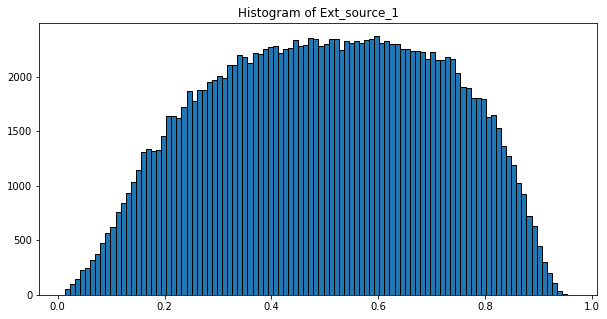

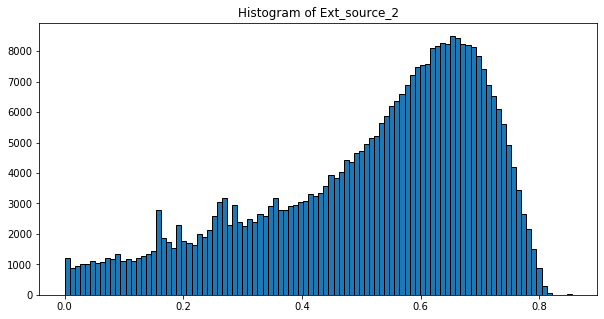

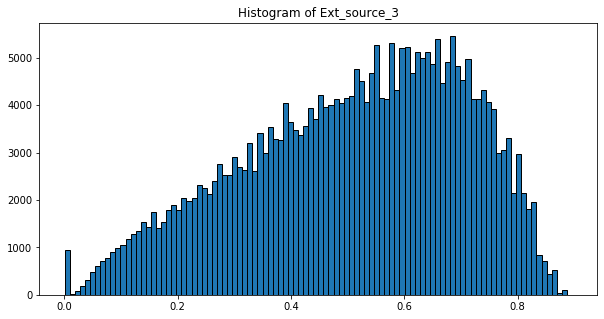

In [21]:
#Plot out the distribution for EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3
plt.figure(figsize =(10,5))
plt.hist(df1['EXT_SOURCE_1'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_1")

plt.figure(figsize=(10,5))
plt.hist(df1['EXT_SOURCE_2'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_2")

plt.figure(figsize=(10,5))
plt.hist(df1['EXT_SOURCE_3'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_3")


plt.show()

For missing data in the ext_source_1, 2, and 3, it would be a good idea to use regression to impute the missing data. However, we need to test whether there will be any correlation between each of the external source and the correlation of each external source vs all other columns. However, based on the correlation test below, each of the external source has no strong statistical correlation with each other. Also each of the external source has no strong statistical correlation with all other columns. Using regression to impute missing data will impose bias on the predicted values. Therefore, I will impute the missing values of Ext_source_1 with mean and missing values of Ext_source_2, Ext_source_3 with the median of each columns.   

In [22]:
#Check on the correlation of the three score
df1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000000,0.212987,0.18139
EXT_SOURCE_2,0.212987,1.000000,0.10848
EXT_SOURCE_3,0.181390,0.108480,1.00000


In [23]:
#Correlation of EXT_SOURCE_1 and all other columns
df1.corr()['EXT_SOURCE_1'].sort_values(ascending=False)

EXT_SOURCE_1                   1.000000
DAYS_EMPLOYED                  0.280783
EXT_SOURCE_2                   0.212987
FLAG_DOCUMENT_6                0.184286
EXT_SOURCE_3                   0.181390
AMT_GOODS_PRICE                0.177335
AMT_CREDIT                     0.171269
AMT_ANNUITY                    0.115974
REGION_POPULATION_RELATIVE     0.098891
FLAG_PHONE                     0.082056
HOUR_APPR_PROCESS_START        0.032901
AMT_INCOME_TOTAL               0.028852
AMT_REQ_CREDIT_BUREAU_MON      0.027661
FLAG_DOCUMENT_9                0.013570
FLAG_EMAIL                     0.012511
AMT_REQ_CREDIT_BUREAU_YEAR     0.008858
FLAG_DOCUMENT_14               0.008802
FLAG_DOCUMENT_19               0.004704
FLAG_DOCUMENT_7                0.003753
FLAG_DOCUMENT_4                0.003155
FLAG_DOCUMENT_15               0.002677
FLAG_DOCUMENT_10               0.002336
FLAG_DOCUMENT_12               0.001571
FLAG_CONT_MOBILE               0.001560
FLAG_DOCUMENT_2                0.001087


In [24]:
#Correlation of EXT_SOURCE_2 and all other columns
df1.corr()['EXT_SOURCE_2'].sort_values(ascending=False)

EXT_SOURCE_2                   1.000000
EXT_SOURCE_1                   0.212987
REGION_POPULATION_RELATIVE     0.201630
HOUR_APPR_PROCESS_START        0.156814
AMT_GOODS_PRICE                0.137816
AMT_CREDIT                     0.130024
AMT_ANNUITY                    0.124447
EXT_SOURCE_3                   0.108480
AMT_INCOME_TOTAL               0.065222
FLAG_PHONE                     0.062979
FLAG_DOCUMENT_8                0.049692
AMT_REQ_CREDIT_BUREAU_MON      0.047439
LIVE_REGION_NOT_WORK_REGION    0.032252
REG_REGION_NOT_WORK_REGION     0.031570
FLAG_EMAIL                     0.022531
FLAG_DOCUMENT_13               0.022105
FLAG_DOCUMENT_14               0.019531
FLAG_EMP_PHONE                 0.017024
REG_REGION_NOT_LIVE_REGION     0.016897
FLAG_DOCUMENT_9                0.015941
FLAG_DOCUMENT_16               0.011935
FLAG_DOCUMENT_15               0.007788
FLAG_DOCUMENT_5                0.005252
FLAG_DOCUMENT_19               0.002986
FLAG_DOCUMENT_4                0.002692


In [25]:
#Correlation of EXT_SOURCE_3 and all other columns
df1.corr()['EXT_SOURCE_3'].sort_values(ascending=False)

EXT_SOURCE_3                   1.000000
EXT_SOURCE_1                   0.181390
DAYS_EMPLOYED                  0.111687
EXT_SOURCE_2                   0.108480
FLAG_DOCUMENT_6                0.073932
AMT_GOODS_PRICE                0.046506
AMT_CREDIT                     0.042806
AMT_ANNUITY                    0.025882
FLAG_CONT_MOBILE               0.008982
FLAG_DOCUMENT_16               0.003036
FLAG_DOCUMENT_4                0.002622
FLAG_MOBIL                     0.002377
FLAG_PHONE                     0.002278
SK_ID_CURR                     0.001494
FLAG_DOCUMENT_17               0.001241
FLAG_DOCUMENT_12               0.001101
FLAG_DOCUMENT_15               0.001040
FLAG_DOCUMENT_13               0.000862
FLAG_DOCUMENT_7                0.000060
OBS_30_CNT_SOCIAL_CIRCLE      -0.000058
OBS_60_CNT_SOCIAL_CIRCLE      -0.000287
FLAG_DOCUMENT_14              -0.000847
AMT_REQ_CREDIT_BUREAU_HOUR    -0.001419
FLAG_DOCUMENT_19              -0.002231
FLAG_DOCUMENT_10              -0.003640


In [26]:
# Fill NA for Ext_source_1 with mean
df1['EXT_SOURCE_1']= df1['EXT_SOURCE_1'].fillna(df1['EXT_SOURCE_1'].mean(), axis=0).values


#sanity check 
df1['EXT_SOURCE_1'].isnull().sum()

0

In [27]:
# Fill NA for EXT_source_2 with median
df1['EXT_SOURCE_2']= df1['EXT_SOURCE_2'].fillna(df1['EXT_SOURCE_2'].median(), axis=0).values


#Sanity check 
df1['EXT_SOURCE_2'].isnull().sum()

0

In [28]:
# Fill NA for EXT_source_3 with median
df1['EXT_SOURCE_3']= df1['EXT_SOURCE_3'].fillna(df1['EXT_SOURCE_3'].median(), axis=0).values


#Sanity check 
df1['EXT_SOURCE_3'].isnull().sum()

0

In [29]:
#Perform the exact same method for Ext_source 1, 2, 3 in test data

#Check the missing data for EXT_SOURCE 1,2,3 in app_test 1
df1[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    0
EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64

For the next section, I will combine the train and test data together for easier cleaning data. After clean the data i will separate out the train vs test data. 

In [30]:
#recheck the missing data summary
total_miss1 = df1.isnull().sum().sort_values(ascending=False)
miss_percent1 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ1 = pd.concat([total_miss1, miss_percent1], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ1[miss_summ1['Missing Percent']>0]

,Total Missing,Missing Percent
OCCUPATION_TYPE,111996,31.437032
TARGET,48744,13.682334
AMT_REQ_CREDIT_BUREAU_DAY,47568,13.352234
AMT_REQ_CREDIT_BUREAU_HOUR,47568,13.352234
AMT_REQ_CREDIT_BUREAU_MON,47568,13.352234
AMT_REQ_CREDIT_BUREAU_QRT,47568,13.352234
AMT_REQ_CREDIT_BUREAU_WEEK,47568,13.352234
AMT_REQ_CREDIT_BUREAU_YEAR,47568,13.352234
NAME_TYPE_SUITE,2203,0.618377
OBS_30_CNT_SOCIAL_CIRCLE,1050,0.294733


### Occupation type

Another significant missing data is occupation type. Lets check the number of different occupation count and the percentage of each occupation. 

In [31]:
print(df1['OCCUPATION_TYPE'].isnull().sum())
print(df1['OCCUPATION_TYPE'].shape)

111996
(356255,)


In [32]:
#Check the distribution of Occupation type
occupation_count = df1['OCCUPATION_TYPE'].value_counts()
occupation_percent = (df1['OCCUPATION_TYPE'].value_counts()/df1['OCCUPATION_TYPE'].count())*100
occupation_summary = pd.concat([occupation_count, occupation_percent], axis=1, keys =['Occupation Count', 'Occupation Percentage'])
occupation_summary

,Occupation Count,Occupation Percentage
Laborers,63841,26.136601
Sales staff,37174,15.219091
Core staff,31931,13.072599
Managers,24945,10.212520
Drivers,21376,8.751366
High skill tech staff,13234,5.418019
Accountants,11441,4.683963
Medicine staff,9853,4.033833
Security staff,7636,3.126190
Cooking staff,6840,2.800306


Based on the occupation count, we can combine the type of occupation into following four categories: Laborers, Sales Staff, Core Staff, and Managers. Merged other occupation into the four categories based on the name of the occupation, since other occupations have less than 10% of the total data.

Laborers include: Drivers, Security Staff, Cooking staff, Cleaning Staff, Low-skill laborers,Waiters/barmen staff, Private service staff

Sales staff include:Realty Agents

Core staff include: High skill tech staff, accountants, Medicine staff, Secretaries, HR staff, IT staff


In [33]:
#Get the occupation summary index
occupation_summary.index

Index(['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff', 'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff'], dtype='object')

In [34]:
#Recategorized laborers category based on the description
#Laborers include: Drivers, Security Staff, Cooking staff, Cleaning Staff, 
#Low-skill laborers,Waiters/barmen staff, Private service staff

df1.loc[df1['OCCUPATION_TYPE'].isin(['Drivers', 'Security staff','Cooking staff','Cleaning staff', 
                                                   'Private service staff', 'Low-skill Laborers', 
                                                   'Waiters/barmen staff']), 'OCCUPATION_TYPE']='Laborers'

#Recategorized Sales staff to include:Realty Agents
df1.loc[df1['OCCUPATION_TYPE'].isin(['Realty agents']),'OCCUPATION_TYPE']='Sales staff'

#Recategorized Core staff to include: High skill tech staff, accountants, Medicine staff, Secretaries, HR staff, IT staff
df1.loc[df1['OCCUPATION_TYPE'].isin(['High skill tech staff', 'Accountants', 'Medicine staff', 'Secretaries',
                                                   'HR staff', 'IT staff']),'OCCUPATION_TYPE']='Core staff'

In [35]:
#Re-Check the distribution of Occupation type
occupation_count = df1['OCCUPATION_TYPE'].value_counts()
occupation_percent = (df1['OCCUPATION_TYPE'].value_counts()/df1['OCCUPATION_TYPE'].count())
occupation_summary = pd.concat([occupation_count, occupation_percent], axis=1, keys =['Occupation Count', 'Occupation Distribution'])
occupation_summary

,Occupation Count,Occupation Distribution
Laborers,112000,0.458530
Core staff,69251,0.283515
Sales staff,38063,0.155830
Managers,24945,0.102125


After recategorized the occupation type, there are still 111K of records still missing occupation. I assume the missing occupation type is missing at random, therefore fill in the missing values based on above distributions. 


In [36]:
#Fill in the na value by the same amount of percentage of current occupation distribution
df1['OCCUPATION_TYPE'].value_counts(normalize=True, dropna=False)

Laborers       0.314382
NaN            0.314370
Core staff     0.194386
Sales staff    0.106842
Managers       0.070020
Name: OCCUPATION_TYPE, dtype: float64

In [37]:
#fill missing occupation with the four predefined categories and distribution percentage
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].fillna(pd.Series(np.random.choice(['Laborers', 'Core staff', 'Sales staff',
                                                                                  'Managers'],p=[0.458530, 0.283515, 
                                                                                                 0.155830, 0.102125], size=len(df1))))

In [38]:
#sanity check
occupation_count1 = df1['OCCUPATION_TYPE'].value_counts()
occupation_percent1 = (df1['OCCUPATION_TYPE'].value_counts()/df1['OCCUPATION_TYPE'].count())
occupation_summary1 = pd.concat([occupation_count1, occupation_percent1], axis=1, keys =['Occupation Count', 'Occupation Distribution'])
occupation_summary1

,Occupation Count,Occupation Distribution
Laborers,163607,0.459241
Core staff,100846,0.283073
Sales staff,55461,0.155678
Managers,36341,0.102008


In [39]:
print(df1['OCCUPATION_TYPE'].isnull().sum())
print(df1['OCCUPATION_TYPE'].shape)

0
(356255,)


In [40]:
#recheck the missing data summary
total_miss1 = df1.isnull().sum().sort_values(ascending=False)
miss_percent1 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ1 = pd.concat([total_miss1, miss_percent1], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ1[miss_summ1['Missing Percent']>0]

,Total Missing,Missing Percent
TARGET,48744,13.682334
AMT_REQ_CREDIT_BUREAU_DAY,47568,13.352234
AMT_REQ_CREDIT_BUREAU_HOUR,47568,13.352234
AMT_REQ_CREDIT_BUREAU_MON,47568,13.352234
AMT_REQ_CREDIT_BUREAU_QRT,47568,13.352234
AMT_REQ_CREDIT_BUREAU_WEEK,47568,13.352234
AMT_REQ_CREDIT_BUREAU_YEAR,47568,13.352234
NAME_TYPE_SUITE,2203,0.618377
OBS_30_CNT_SOCIAL_CIRCLE,1050,0.294733
DEF_60_CNT_SOCIAL_CIRCLE,1050,0.294733


### AMT req credit bureau day, hour, month, quarter, week, year

The next missing items I will be dealing with are related to the columns AMT_REQ_CREDIT_BUREAU_DAY/HOUR/MON/QRT/WEEK/YEAR. According to the data description, the columns are measure number of inquiries to Credit Bureau about the client one hour/one month/one quarter/one week/one year before application. This seems important to our analysis. Based on common sense we know that the more inquiries you have on your credit file the less your credit score will be. Therefore, these numbers might be some important features to the prediction. Lets explore the distribution and correlation of the data first. 

In [73]:
#Check the correlation for these columns
df1[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON',
     'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr()

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_REQ_CREDIT_BUREAU_DAY,1.000000,0.227493,-0.003313,-0.005853,0.214474,-0.003224
AMT_REQ_CREDIT_BUREAU_HOUR,0.227493,1.000000,0.002163,-0.004997,0.005566,-0.003516
AMT_REQ_CREDIT_BUREAU_MON,-0.003313,0.002163,1.000000,-0.020014,-0.007699,-0.005750
AMT_REQ_CREDIT_BUREAU_QRT,-0.005853,-0.004997,-0.020014,1.000000,-0.020230,0.066747
AMT_REQ_CREDIT_BUREAU_WEEK,0.214474,0.005566,-0.007699,-0.020230,1.000000,0.016578
AMT_REQ_CREDIT_BUREAU_YEAR,-0.003224,-0.003516,-0.005750,0.066747,0.016578,1.000000


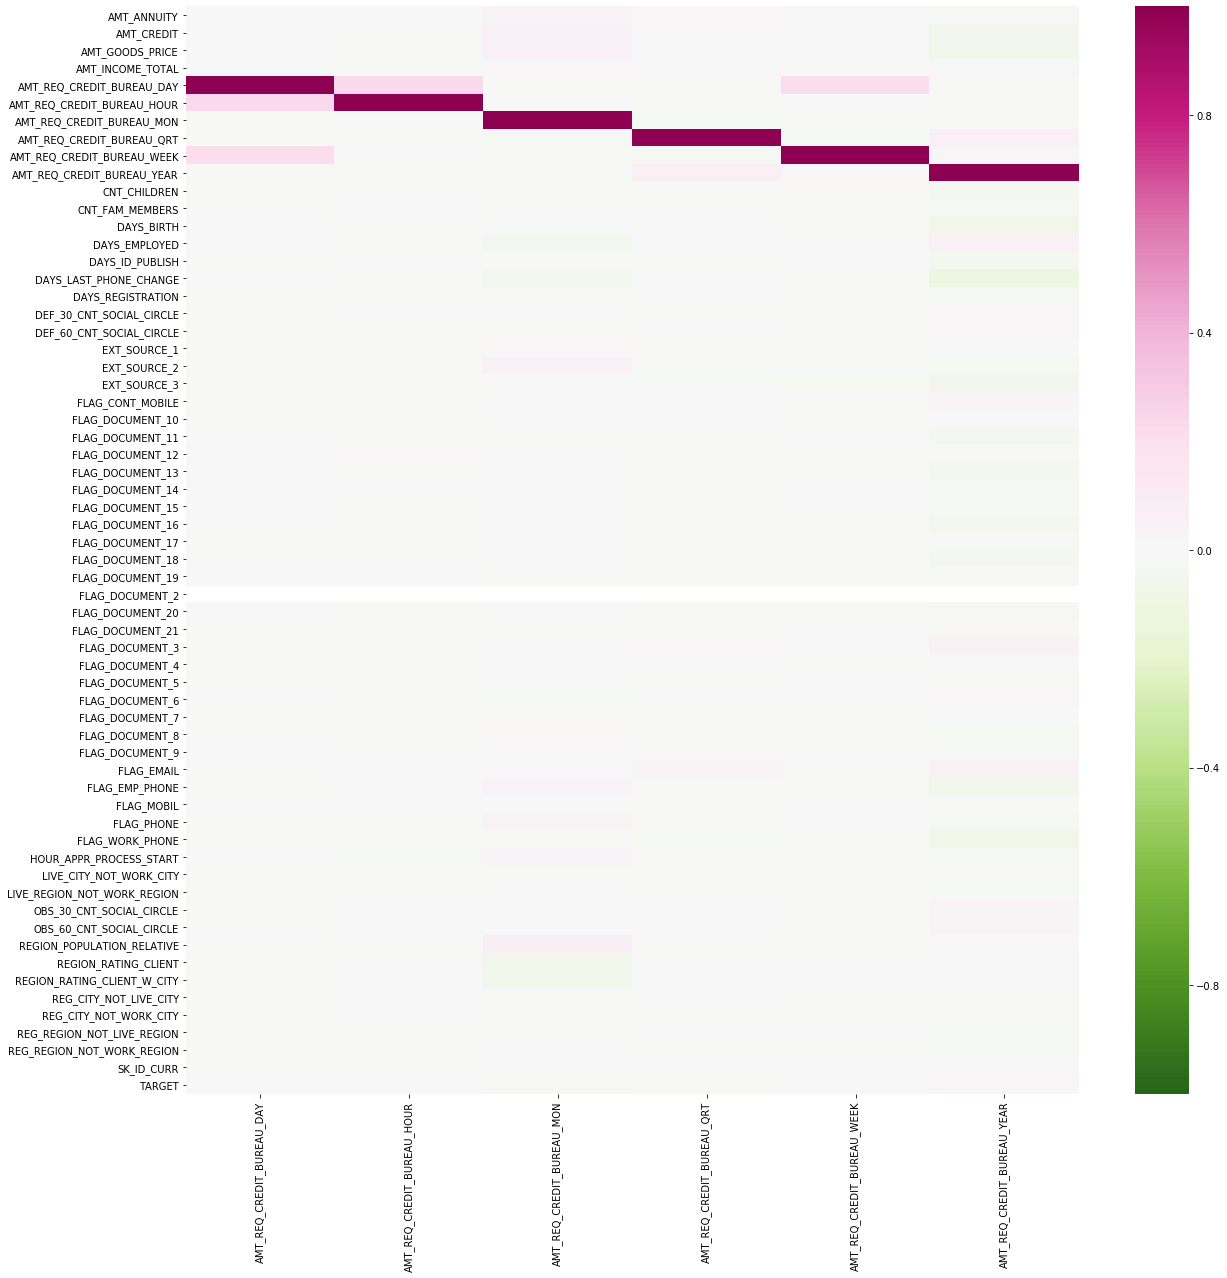

In [84]:
#check correlations with other columns
correlations = df1.corr()[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

#visulized correlation matrix in heat map
plt.figure(figsize=(20,20))
sns.heatmap(correlations, vmin=-1, vmax=1,cmap="PiYG_r")
plt.show()

In [66]:
#Explore AMT_req_credit_bureau_day
df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True,dropna=False)

0.0    0.862102
NaN    0.133522
1.0    0.003803
2.0    0.000317
3.0    0.000126
4.0    0.000073
5.0    0.000025
6.0    0.000022
9.0    0.000006
8.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [67]:
#Explore AMT_req_credit_bureau_hour
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True,dropna=False)
         

0.0    0.861664
NaN    0.133522
1.0    0.004626
2.0    0.000160
3.0    0.000025
4.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [68]:
#Explore AMT_req_credit_bureau_MON
df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True, dropna=False)

0.0     0.742653
NaN     0.133522
1.0     0.093952
2.0     0.015183
3.0     0.005600
4.0     0.003023
5.0     0.001693
6.0     0.000966
7.0     0.000836
9.0     0.000578
8.0     0.000519
10.0    0.000371
11.0    0.000334
12.0    0.000216
13.0    0.000202
14.0    0.000112
15.0    0.000098
16.0    0.000065
17.0    0.000039
18.0    0.000017
19.0    0.000008
23.0    0.000003
27.0    0.000003
22.0    0.000003
24.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [69]:
#Explore AMT_req_credit_bureau_QRT
df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True,dropna=False)

0.0      0.670800
1.0      0.138763
NaN      0.133522
2.0      0.048869
3.0      0.006209
4.0      0.001496
5.0      0.000211
6.0      0.000081
7.0      0.000022
8.0      0.000020
19.0     0.000003
261.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [70]:
#Explore AMT_req_credit_bureau_week
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True,dropna=False)

0.0    0.842192
NaN    0.133522
1.0    0.023357
2.0    0.000567
3.0    0.000163
4.0    0.000095
6.0    0.000056
5.0    0.000028
8.0    0.000014
7.0    0.000006
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [71]:
#Explore AMT_req_credit_bureau_year
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True,dropna=False)

0.0     0.231969
1.0     0.203832
2.0     0.164716
NaN     0.133522
3.0     0.111779
4.0     0.068656
5.0     0.039657
6.0     0.022720
7.0     0.012412
8.0     0.006804
9.0     0.003419
10.0    0.000121
11.0    0.000121
12.0    0.000098
13.0    0.000059
14.0    0.000031
17.0    0.000022
15.0    0.000017
19.0    0.000011
18.0    0.000011
16.0    0.000008
21.0    0.000003
23.0    0.000003
25.0    0.000003
20.0    0.000003
22.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Based on the results above, there are no strong correlations be different time period for the credit inquiries and there are no strong correlations with other features. In order to not distort the distribution of the filled missing values, it is better to fill the missing values by the same distribution of the current numbers. 

In [95]:
#Fill NA by the distribution 

# get the ratio distribution of day, month, qrt, week, and year in the orignal data without na
r_day = df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)
r_hour = df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)
r_mon = df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)
r_qrt = df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)
r_week = df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)
r_year = df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)

In [110]:
#Fill NA in AMT_REQ_CREDIT_BUREAU_DAY
df1['AMT_REQ_CREDIT_BUREAU_DAY'] = df1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(pd.Series(
    np.random.choice(r_day.index, p=r_day.values, size=len(df1))))

#Fill NA in AMT_REQ_CREDIT_BUREAU_HOUR
df1['AMT_REQ_CREDIT_BUREAU_HOUR'] = df1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(pd.Series(
    np.random.choice(r_hour.index, p=r_hour.values, size=len(df1))))

#Fill NA in AMT_REQ_CREDIT_BUREAU_MON
df1['AMT_REQ_CREDIT_BUREAU_MON'] = df1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(pd.Series(
    np.random.choice(r_mon.index, p=r_mon.values, size=len(df1))))

#Fill NA in AMT_REQ_CREDIT_BUREAU_QRT
df1['AMT_REQ_CREDIT_BUREAU_QRT'] = df1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(pd.Series(
    np.random.choice(r_qrt.index, p=r_qrt.values, size=len(df1))))

#Fill NA in AMT_REQ_CREDIT_BUREAU_WEEK
df1['AMT_REQ_CREDIT_BUREAU_WEEK'] = df1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(pd.Series(
    np.random.choice(r_week.index, p=r_week.values, size=len(df1))))

#Fill NA in AMT_REQ_CREDIT_BUREAU_YEAR
df1['AMT_REQ_CREDIT_BUREAU_YEAR'] = df1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(pd.Series(
    np.random.choice(r_year.index, p=r_year.values, size=len(df1))))

In [111]:
#sanity check 
col = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
      'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR']

for i in col:
    print(df1[i].isnull().sum())

0
0
0
0
0
0


In [113]:
#recheck the missing data summary
total_miss3 = df1.isnull().sum().sort_values(ascending=False)
miss_percent3 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ3 = pd.concat([total_miss3, miss_percent3], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ3[miss_summ3['Missing Percent']>0]

,Total Missing,Missing Percent
TARGET,48744,13.682334
NAME_TYPE_SUITE,2203,0.618377
DEF_30_CNT_SOCIAL_CIRCLE,1050,0.294733
DEF_60_CNT_SOCIAL_CIRCLE,1050,0.294733
OBS_30_CNT_SOCIAL_CIRCLE,1050,0.294733
OBS_60_CNT_SOCIAL_CIRCLE,1050,0.294733
AMT_GOODS_PRICE,278,0.078034
AMT_ANNUITY,36,0.010105
CNT_FAM_MEMBERS,2,0.000561
DAYS_LAST_PHONE_CHANGE,1,0.000281


### Name_Type_Suite

Name_type_suite is the measurement of who was accompany client when he was applying for the loan. The data dictionary did not specify whether it means taking a co-signer for the loan. Therefore, we will simply assume it is just who accompany the client to the branch at the time of applying the loan. Lets explore the data first. 

In [144]:
#check the distribution of the Name_Type_Suite
df1['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
NaN                  2203
Other_B              1981
Other_A               975
Group of people       320
Name: NAME_TYPE_SUITE, dtype: int64

Based on the results, we can further recategorized this column by adding group of people to family and distribute NaN and other_B, other_A to other groups based on the current distribution ratio.

In [170]:
#recategorized Group of people to Family
df1.loc[df1['NAME_TYPE_SUITE'].isin(['Group of people']), 'NAME_TYPE_SUITE']='Family'

#Change other_b and other_A to NAN
df1.loc[df1['NAME_TYPE_SUITE'].isin(['Other_B', 'Other_A']), 'NAME_TYPE_SUITE']=np.nan 

#Sanity check 
df1['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      288253
Family              46350
Spouse, partner     12818
NaN                  5159
Children             3675
Name: NAME_TYPE_SUITE, dtype: int64

In [173]:
#Redistribute NaN to other categories based on current ratio

r_name = df1['NAME_TYPE_SUITE'].value_counts(normalize=True, dropna=False)
df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].fillna(pd.Series(
    np.random.choice(r_name.index, p = r_name.values, size=len(df1))))

# Sanity Check 
df1['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      292488
Family              47037
Spouse, partner     13004
Children             3726
Name: NAME_TYPE_SUITE, dtype: int64

In [174]:
#recheck the missing data summary
total_miss3 = df1.isnull().sum().sort_values(ascending=False)
miss_percent3 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ3 = pd.concat([total_miss3, miss_percent3], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ3[miss_summ3['Missing Percent']>0]

,Total Missing,Missing Percent
TARGET,48744,13.682334
OBS_60_CNT_SOCIAL_CIRCLE,1050,0.294733
DEF_60_CNT_SOCIAL_CIRCLE,1050,0.294733
DEF_30_CNT_SOCIAL_CIRCLE,1050,0.294733
OBS_30_CNT_SOCIAL_CIRCLE,1050,0.294733
AMT_GOODS_PRICE,278,0.078034
AMT_ANNUITY,36,0.010105
CNT_FAM_MEMBERS,2,0.000561
DAYS_LAST_PHONE_CHANGE,1,0.000281


### Data missing less than 1%

Next we will deal with missing data that are missing less than 1% of the whole data. Since they are missing immaterial, I will fill in the missing values by either mean or median based on the distribution. 

1. DEF/OBS_30/60_CNT_SOCIAL_CIRCLE. According to the data dictionary, OBS_30/60_CNT_SOCIAL_CIRCLE are the measurement of client's social surroundings with observable 30/60 DPD (days past due) default. DEF_30/60_CNT_SOCIAL_CIRCLE are the measurement of client's social surroundings defaulted on 30/60 DPD (days past due). 

In [141]:
df1[['DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].describe()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,355205.000000,355205.000000,355205.000000,355205.000000
mean,0.143452,1.425729,0.100198,1.409468
std,0.456579,2.599914,0.368259,2.577724
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,2.000000
max,34.000000,354.000000,24.000000,351.000000


In [175]:
# check the median
df1[['DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].median()

DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

In [176]:
#fill in na with median
df1['DEF_30_CNT_SOCIAL_CIRCLE']= df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df1['DEF_30_CNT_SOCIAL_CIRCLE'].median(),axis=0).values
df1['OBS_30_CNT_SOCIAL_CIRCLE']= df1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df1['OBS_30_CNT_SOCIAL_CIRCLE'].median(), axis=0).values
df1['DEF_60_CNT_SOCIAL_CIRCLE']= df1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df1['DEF_60_CNT_SOCIAL_CIRCLE'].median(),axis=0).values
df1['OBS_60_CNT_SOCIAL_CIRCLE']= df1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df1['OBS_60_CNT_SOCIAL_CIRCLE'].median(), axis=0).values

#recheck the missing data summary
total_miss3 = df1.isnull().sum().sort_values(ascending=False)
miss_percent3 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ3 = pd.concat([total_miss3, miss_percent3], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ3[miss_summ3['Missing Percent']>0]

,Total Missing,Missing Percent
TARGET,48744,13.682334
AMT_GOODS_PRICE,278,0.078034
AMT_ANNUITY,36,0.010105
CNT_FAM_MEMBERS,2,0.000561
DAYS_LAST_PHONE_CHANGE,1,0.000281


2. AMT_GOODS_PRICE is the measurement of the price of the goods for which the loan is given

3. AMT_ANNUITY is the loan annuity.

4. CNT_FAM_MEMBERS is how many family member does the client have

5. DAYS_LAST_PHONE_CHANGE is how many days since last time client change phone number

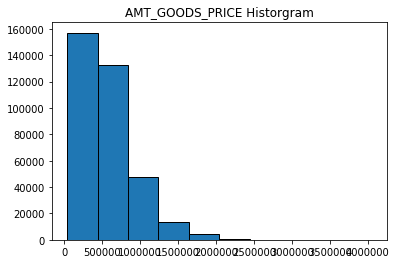

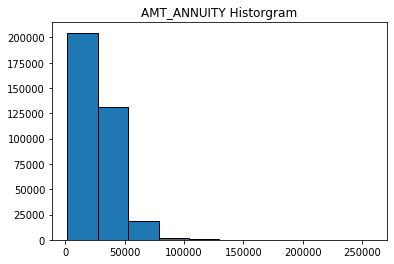

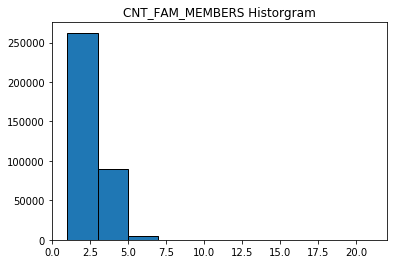

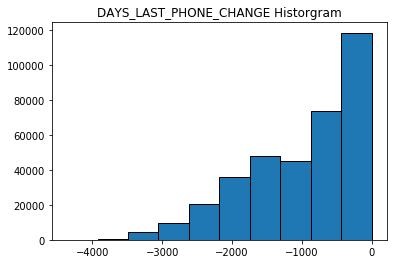

In [181]:
#Check the distribution

cols= ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

for i in cols:
    plt.figure()
    plt.hist(df1[i], edgecolor='black')
    plt.title(f'{i} Historgram')
    
plt.show()


In [186]:
#Calculate the summary stats and median value
df1[cols].mean()

AMT_GOODS_PRICE           528019.997800
AMT_ANNUITY                27425.560657
CNT_FAM_MEMBERS                2.151858
DAYS_LAST_PHONE_CHANGE      -978.580852
dtype: float64

In [187]:
df1[cols].median()

AMT_GOODS_PRICE           450000.0
AMT_ANNUITY                25078.5
CNT_FAM_MEMBERS                2.0
DAYS_LAST_PHONE_CHANGE      -771.0
dtype: float64

Since all of the distribution are not symmetric, fill the NA with median for all of the four columns. 

In [192]:
#fill na with median value in the four columns

for i in cols:
    df1[i] = df1[i].fillna(df1[i].median(), axis=0).values

In [191]:
#recheck the missing data summary
total_miss4 = df1.isnull().sum().sort_values(ascending=False)
miss_percent4 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ4 = pd.concat([total_miss4, miss_percent4], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ4[miss_summ4['Missing Percent']>0]

,Total Missing,Missing Percent
TARGET,48744,13.682334


The Target column has missing, which is the testing set that we need to predict later. So it is ok to leave it missing. All of the main data training and testing have been cleared of missing data. 

In [195]:
df1.to_csv('Data/cleaned_df.csv', index=False)

In [2]:
df1 = pd.read_csv('Data/cleaned_df.csv')

## Duplicate data

In [7]:
#check duplicate rows 
df1.duplicated().sum()

0

In [11]:
#Check duplicate columns
df1.T.duplicated()

KeyboardInterrupt: 

## Explore the data

### Examine the columns with category values

In [12]:
#Check df1 which columns are category values 
df1.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,WEEKDAY_APPR_PROCESS_START
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,M,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.083037,0.262949,0.139376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,10,0,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,2.0,2.0,Laborers,Business Entity Type 3,0.018801,2,2,0,0,0,0,100002,1.0,WEDNESDAY
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,F,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.311267,0.622246,0.533482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,N,1,0,11,0,0,Cash loans,Higher education,Married,House / apartment,State servant,Family,1.0,1.0,Core staff,School,0.003541,1,1,0,0,0,0,100003,0.0,MONDAY
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,M,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,0.501965,0.555912,0.729567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,Y,Y,1,1,9,0,0,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.0,0.0,Laborers,Government,0.010032,2,2,0,0,0,0,100004,0.0,MONDAY
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,F,-19005,-3039,-2437,-617.0,-9833.0,0.0,0.0,0.501965,0.650442,0.533482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,0,0,17,0,0,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,2.0,2.0,Laborers,Business Entity Type 3,0.008019,2,2,0,0,0,0,100006,0.0,WEDNESDAY
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,M,-19932,-3038,-3458,-1106.0,-4311.0,0.0,0.0,0.501965,0.322738,0.533482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,N,Y,0,0,11,1,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.0,0.0,Core staff,Religion,0.028663,2,2,0,1,0,0,100007,0.0,THURSDAY


In [13]:
df1.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    

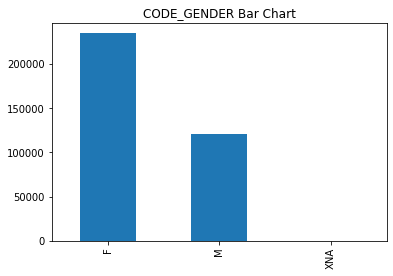

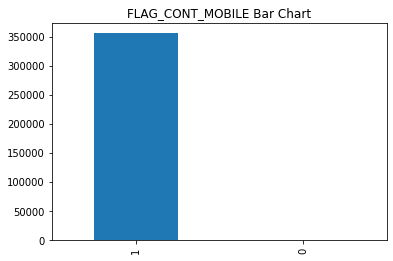

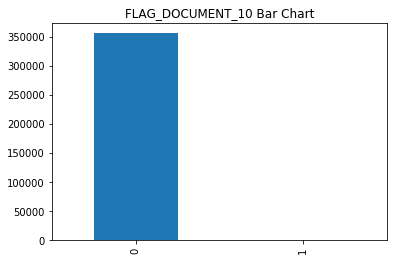

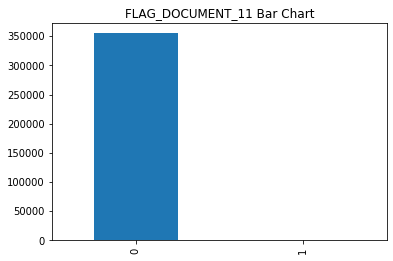

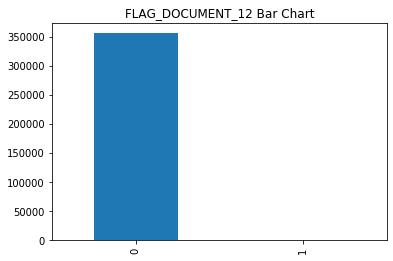

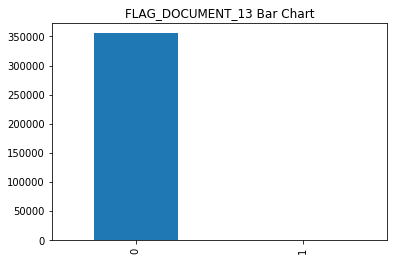

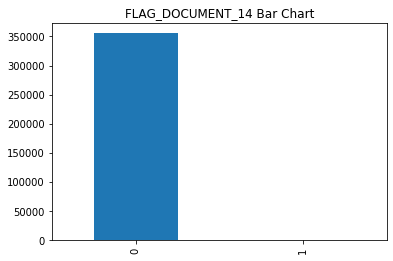

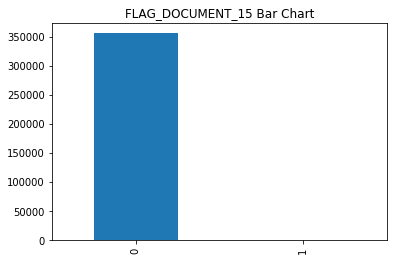

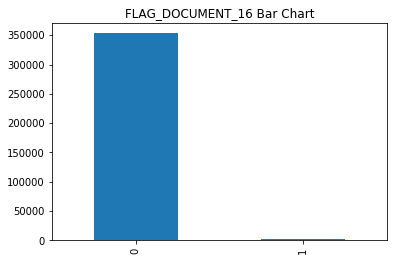

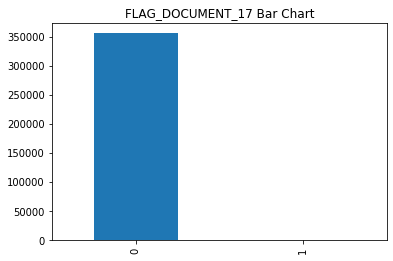

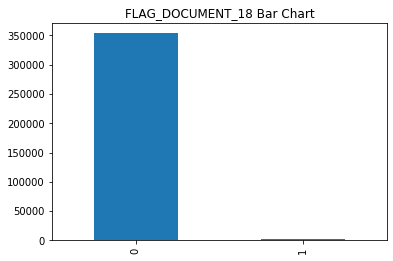

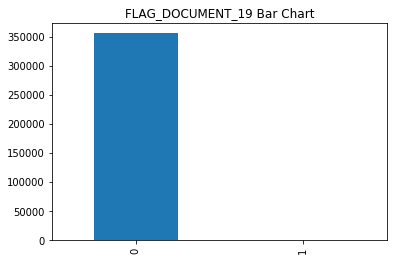

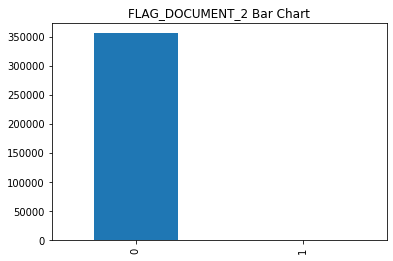

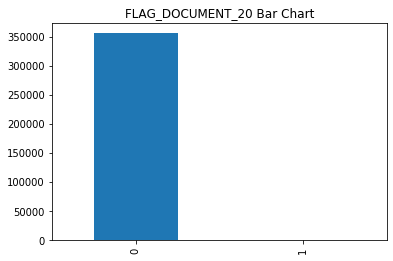

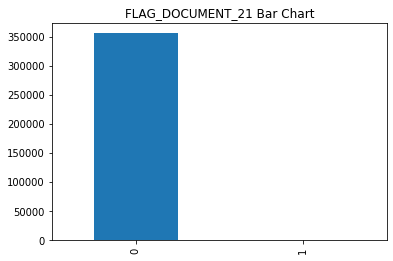

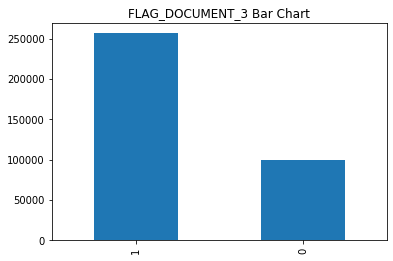

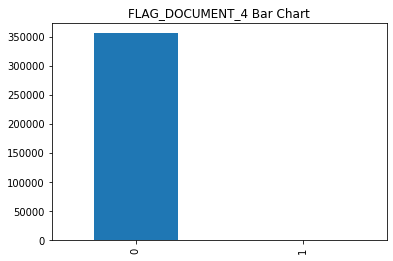

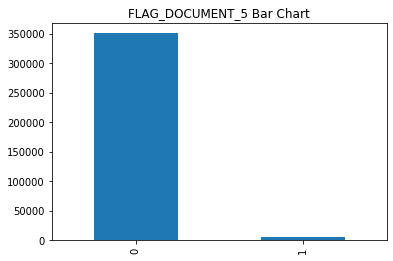

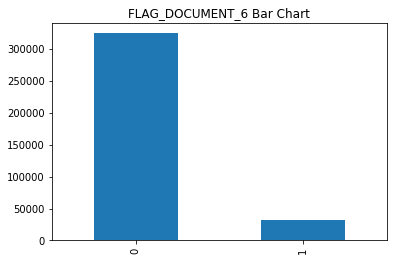

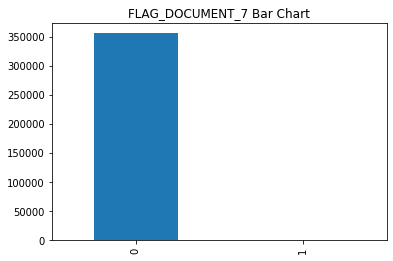

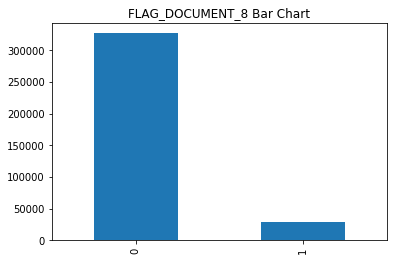

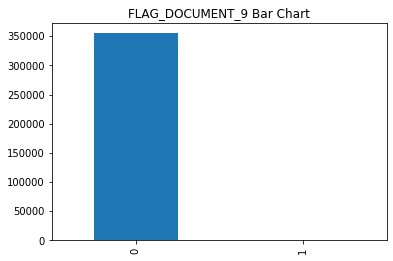

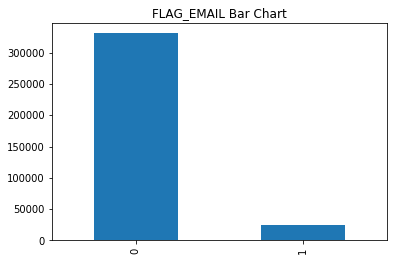

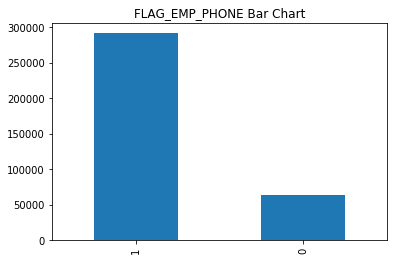

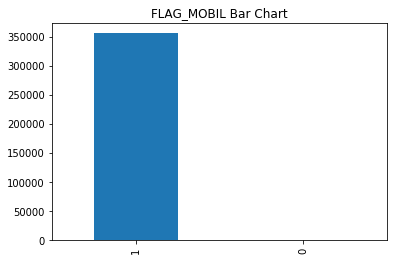

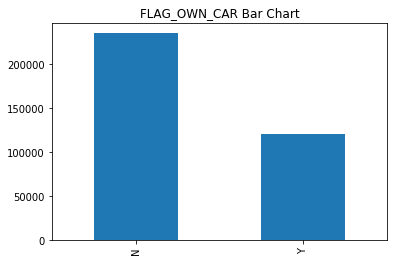

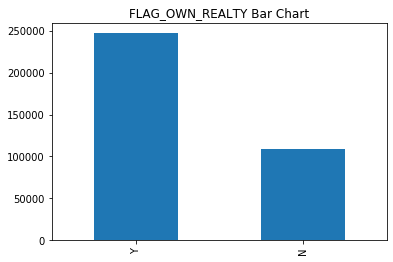

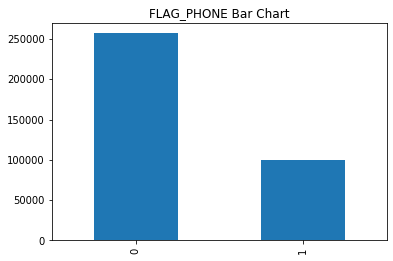

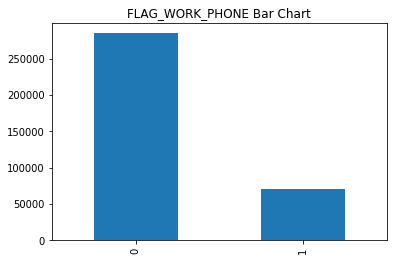

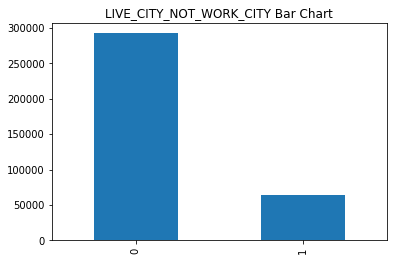

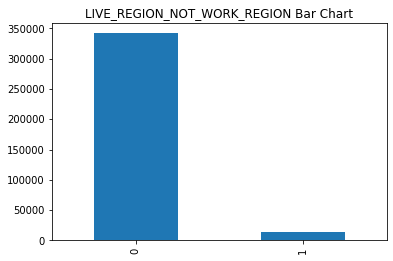

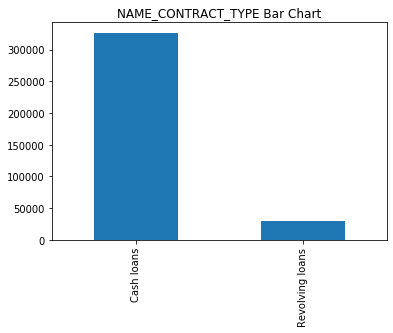

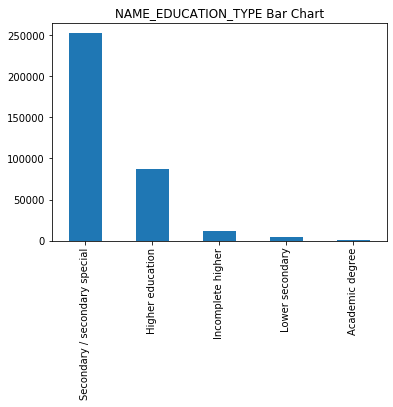

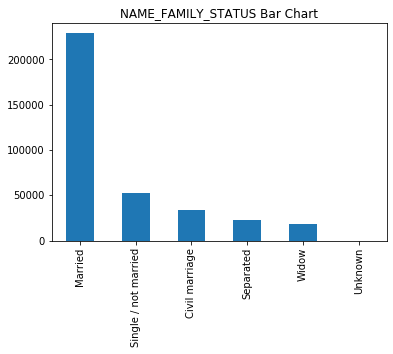

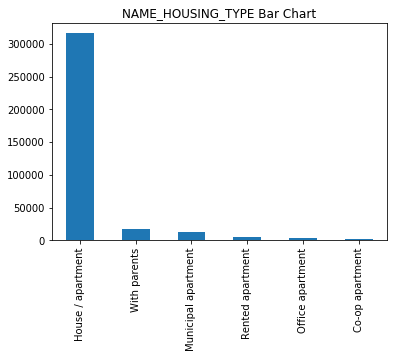

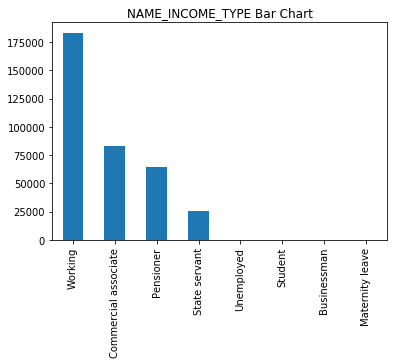

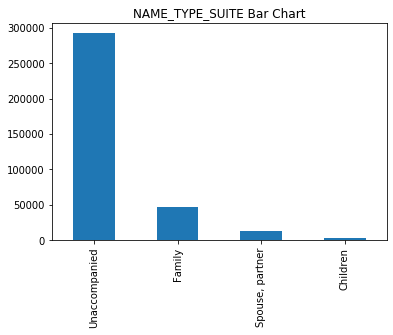

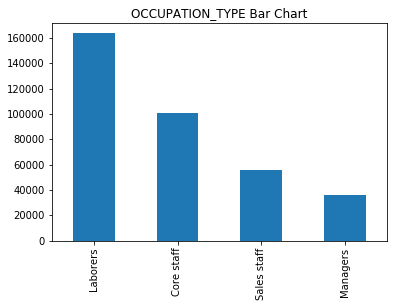

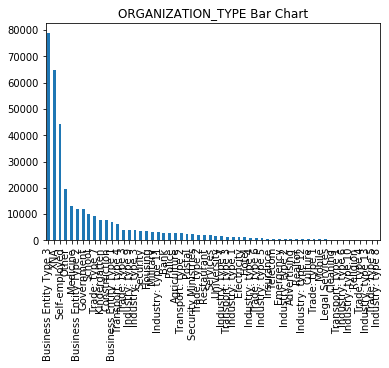

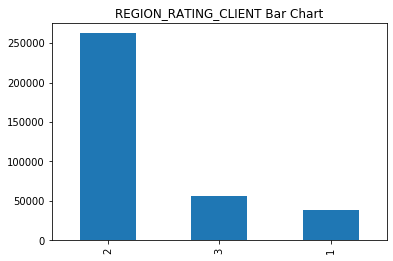

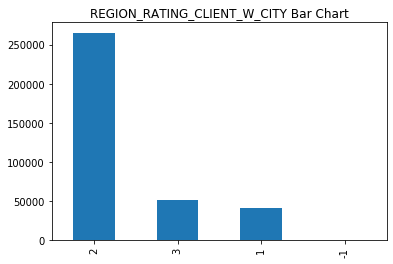

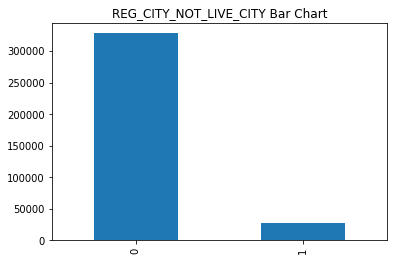

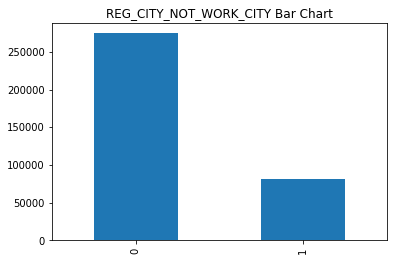

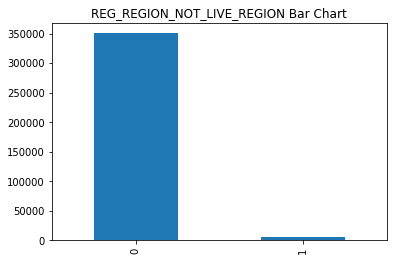

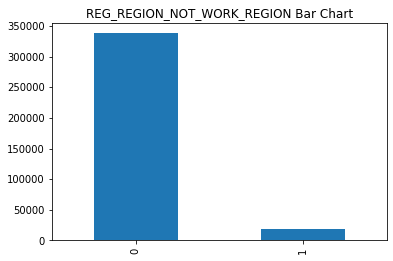

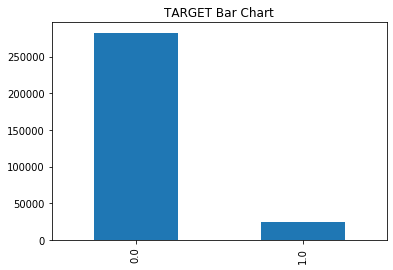

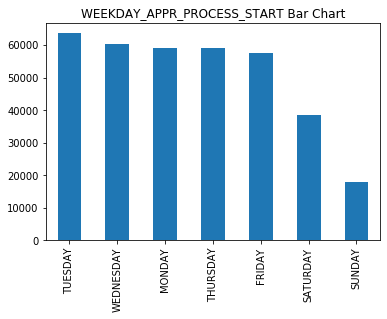

In [19]:
#loop over category columns to check the distribution 
cat_columns=['CODE_GENDER','FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
             'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
             'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
             'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 
             'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','FLAG_PHONE', 'FLAG_WORK_PHONE', 
             'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 
             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE','OCCUPATION_TYPE', 
             'ORGANIZATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 
             'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','TARGET', 
             'WEEKDAY_APPR_PROCESS_START']

for j in cat_columns:
    #plot the frequency
    df1[j].value_counts().plot(kind='bar')
    plt.title(f'{j} Bar Chart')
    plt.show()
    

### Convert the categorical columns to dummy 

#### Code Gender

In the code gender columns, there are 4 rows marks with xna. Since it is very small number, we will just change these four to Male category. In addition, we will change Female to 0 and Male to 1 as categorical variables

In [24]:
#Convert male to 1 and female to 0

df1['CODE_GENDER'].replace(to_replace={'F':0, 'M':1, 'XNA':1}, inplace=True)

#sanity check on gender
df1['CODE_GENDER'].value_counts()

0    235126
1    121129
Name: CODE_GENDER, dtype: int64

#### FLAG_OWN_CAR, FLAG_OWN_REALTY

Change Y to 1 and N to 0

In [28]:
#flag_own_car y to 1 n to 0
df1['FLAG_OWN_CAR'].replace(to_replace={'Y':1,'N':0}, inplace=True)

#flag_own_realty y to 1 n to 0
df1['FLAG_OWN_REALTY'].replace(to_replace={'Y':1,'N':0}, inplace=True)

#sanity check 
display(df1['FLAG_OWN_CAR'].value_counts())
display(df1['FLAG_OWN_REALTY'].value_counts())

0    235235
1    121020
Name: FLAG_OWN_CAR, dtype: int64

1    246970
0    109285
Name: FLAG_OWN_REALTY, dtype: int64

#### Name Contract type 
Cash loans to 1 and Revolving loans to 0

In [32]:
#Name Contract type Cash loans to 1 and Revolving loans to 0
df1['NAME_CONTRACT_TYPE'].replace(to_replace={'Cash loans':1,'Revolving loans':0}, inplace=True)

#Sanity Check
df1['NAME_CONTRACT_TYPE'].value_counts()

1    326537
0     29718
Name: NAME_CONTRACT_TYPE, dtype: int64

#### Explore the Organzation type

Change XNA to Other in Organization type.

In [55]:
#replace XNA to Other 
df1['ORGANIZATION_TYPE'].replace(to_replace={'XNA':'Other'}, inplace=True)

#sanity check 
df1['ORGANIZATION_TYPE'].value_counts()

Other                     84038
Business Entity Type 3    78832
Self-employed             44332
Medicine                  12909
Business Entity Type 2    12032
Government                11912
School                    10180
Trade: type 7              9134
Kindergarten               7918
Construction               7760
Business Entity Type 1     6871
Transport: type 4          6282
Trade: type 3              4070
Industry: type 9           3867
Industry: type 3           3767
Security                   3719
Housing                    3393
Military                   3164
Industry: type 11          3120
Bank                       2881
Police                     2782
Agriculture                2746
Transport: type 2          2652
Postal                     2451
Security Ministries        2315
Trade: type 2              2142
Restaurant                 2095
Services                   1877
University                 1548
Industry: type 7           1524
Transport: type 3          1361
Industry

#### One Hot Encoding

The following columns contains more than 2 categories, it is safer to use one hot encoding to replace the categorical value to dummy than label encoding, since they have no orders in the category:

NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, NAME_INCOME_TYPE, NAME_TYPE_SUITE, OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION TYPE

In [57]:
#Change categorical columns to dummy with one-hot encoding
df2 = pd.get_dummies(df1)

display(df1.shape)
df2.shape

(356255, 74)

(356255, 163)

### Examine the columns with numeric values

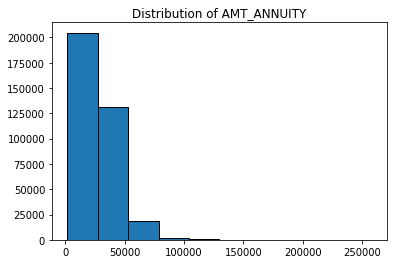

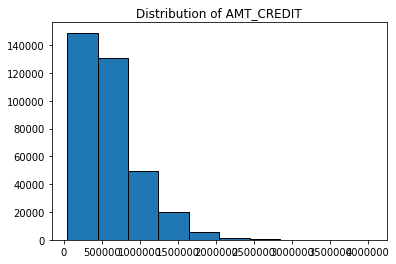

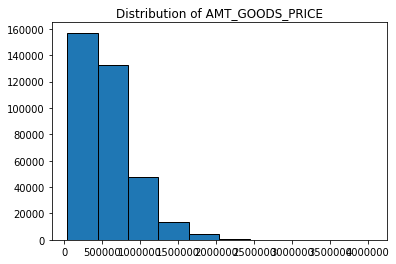

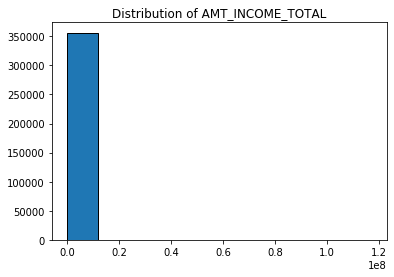

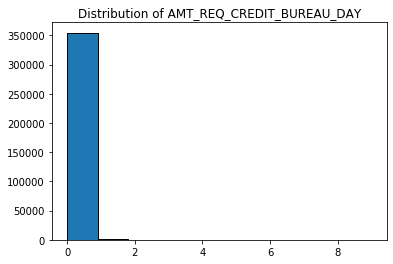

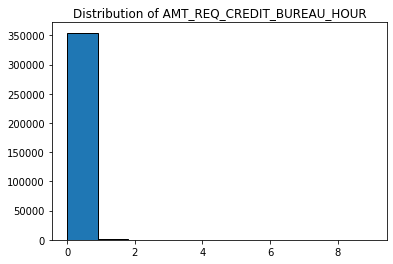

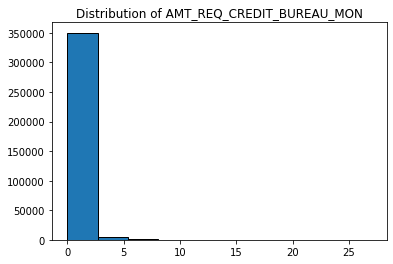

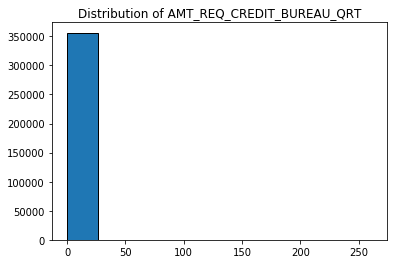

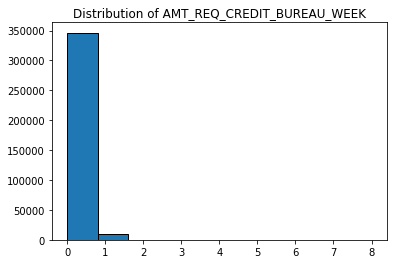

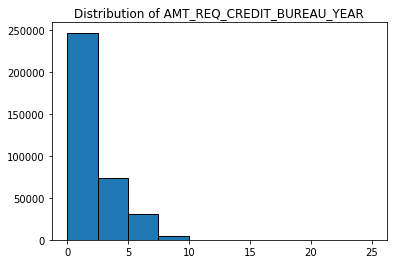

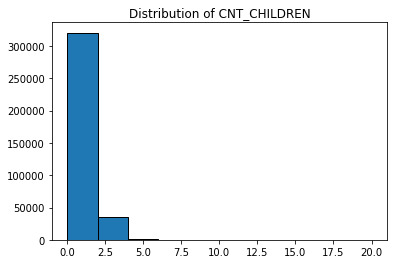

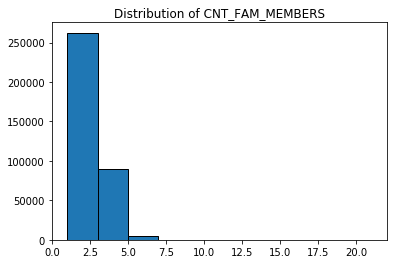

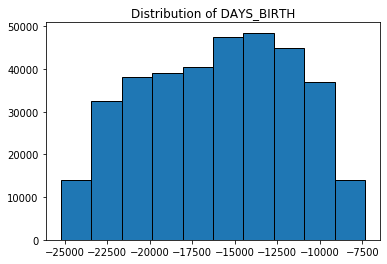

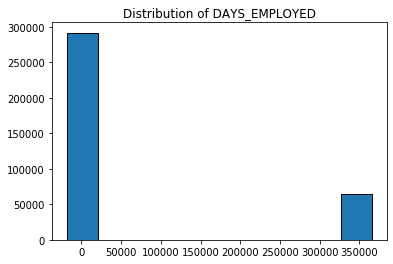

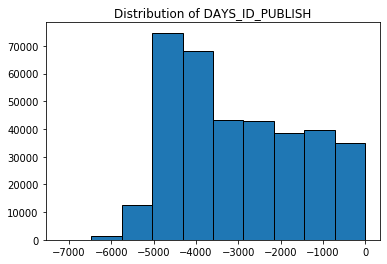

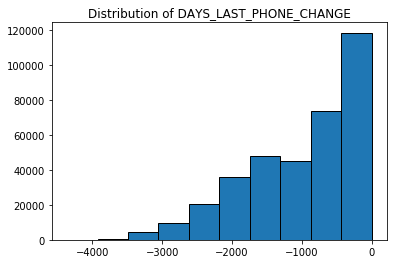

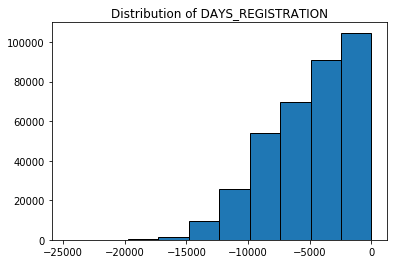

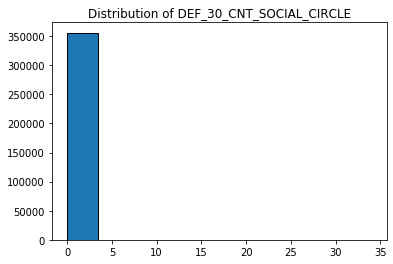

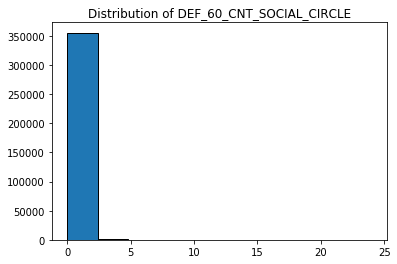

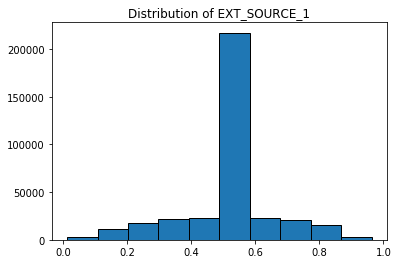

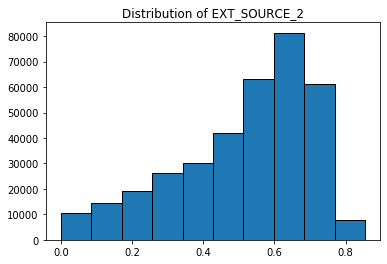

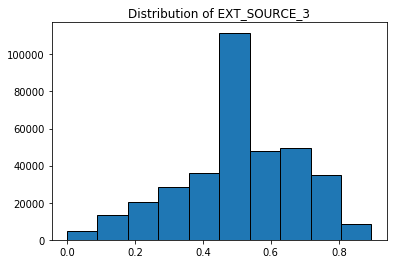

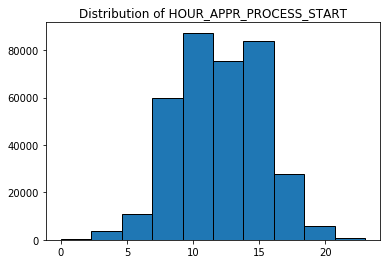

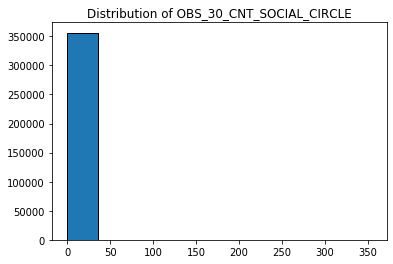

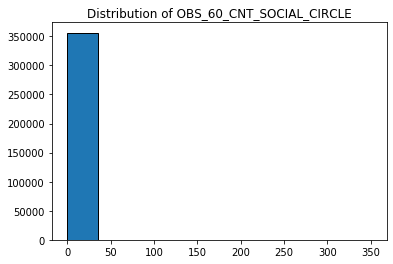

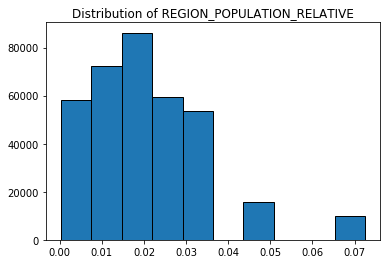

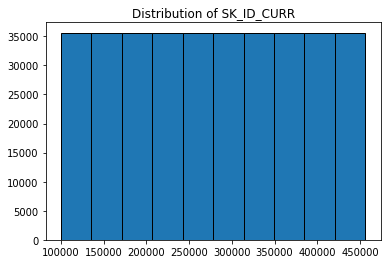

In [20]:
#loop over numeric columns to check the distribution 
num_columns=df1.columns[~df1.columns.isin(cat_columns)]

for i in num_columns:
    #plot the histgram
    plt.figure()
    plt.hist(df1[i], edgecolor = 'black')
    plt.title(f'Distribution of {i}')
    plt.show()
  

# To Be Continued